# Project: Flame Dynamics Identification

In this project, you will have to develop a neural network that can learn the dynamics of a flame.
More specifically, the flame dynamics represent how the heat release rate of a flame varies when it is subjected to velocity perturbation and has a strong impact on the overall stability of gas turbines or jet engines. Indeed, a coupling mechanism can occur between the velocity flucatuation, heat release fluctuation and the acoustics of the combustor leading to a phenomena called, _thermoacoustic instabilities_.

More specifically, you will need to identify the following relation:
\begin{equation}
\dot{Q}'=\mathcal{F}(u')
\end{equation}

where $\dot{Q}'$ and $u'$ represent the normalized heat release rate oscillation and the normalized velocity perturbation respectively.

To do so, we are providing you with three different sets of time series of $(u'(t),\dot{Q}'(t))$. Each of those time series have been obtained from simulation where the flame was excited with a broadband signal (meaning that there is a large frequency content in the excitation signal).

The tasks for the project are:
1. To train different neural networks for each dataset.
2. To obtain the frequency response of each trained neural network for excitation amplitudes of 0.5, 1.0 and 1.5. Vaildations data are provided for you to assess the accuracy of your trained neural network.

The frequency response is obtained by exciting the neural network with a harmonic signal (meaning a sine at a specified frequency with a fixed amplitude). Then, the gain (ratio between the resulting heat release rate signal and excitation signal: $\dot{Q}'/u'$) and phase (the delay between the two signals) are computed.

3. Study the accuracy of the trained neural network depending on the length of the training signal used.

The remainder of this notebook will indicate to you how to read the different data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# load the required libraries
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
from scipy import signal
import os
import h5py
# pandas is a python library dedicated to data manipulation and analysis
import pandas as pd

# 1. Read the input data

In [ ]:
# User defined variables, please provide necessary inputs
fld = './drive/MyDrive/CYPHER_SCHOOL/'
input_file = fld + "Data/input_data_3.csv" # location of input file
output_file = fld + "Data/output_data_3.csv" # location of output file (true labels)
Ts = 0.000001 # sampling time of the data - The data has been sampled with a sampling time of 0.000001 [s]



999999


<IPython.core.display.Javascript object>


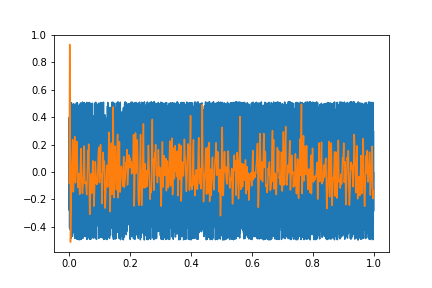

In [ ]:
# load dataset
X_ = pd.read_csv(input_file, header=None)
Y_ = pd.read_csv(output_file, header=None)
T_ = np.arange(X_.shape[0], dtype=int)*Ts
X_ = X_[10000:]
Y_ = Y_[10000:]
T_ = T_[10000:] - T_[10000]
m = X_.shape[0] # number of input data points

print(m)
%matplotlib inline
plt.figure()
plt.plot(T_,X_)
plt.plot(T_,Y_)

# 2. Validation data
As explained, the validation is going to be performed by comparing the frequency response of the neural network and the one from CFD.
The data from the CFD is provided and we show in the code hereunder how to plot it.

In [ ]:
fln = fld + './Validation_data/Flame_valid_data.h5'
hf = h5py.File(fln,'r')
list(hf.keys())
FDF_freq = np.array(hf.get('f'))
FDF_Gain = np.array(hf.get('Gain'))
FDF_phase = np.array(hf.get('phase'))

Each line of those arrays corresponds to excitation amplitude of respectively 0.5, 1.0 and 1.5.

Text(0, 0.5, 'Phase delay [rad]')

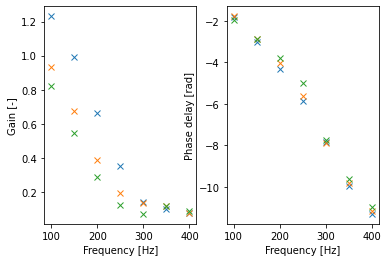

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(3):
    ax.plot(FDF_freq[i,:],FDF_Gain[i,:],'x')
    ax2.plot(FDF_freq[i,:],FDF_phase[i,:],'x')

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Gain [-]')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Phase delay [rad]')

# 3. Design of the neural network


In this section, design a neural network which receives as input a given history of velocity fluctuation and predicts the heat release rate fluctuation at one time instant. For the exercise, attempts both to use a MLP and a RNN for the same task. The time-series of history should be ~10ms.

Note that we are interested in the frequency response up to maximum 1kHz.